In [2]:
# !pip install --upgrade numpy
# !pip install --upgrade tensorflow
# import tensorflow as tf
# print(tf.__version__)
# !pip install tensorflow
# !pip install numpy
# import numpy as np
# print(np.__version__)
# !pip install --upgrade scipy numba daal4py

# !pip install --force-reinstall numpy


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Load the MNIST dataset directly from TensorFlow
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to the range 0-1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convert labels to one-hot encoding directly using TensorFlow utilities
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Convert each 28x28 image into a flat array of 784 pixels
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons and ReLU activation
    Dropout(0.2),                   # Dropout layer to reduce overfitting
    Dense(64, activation='relu'),   # Second hidden layer with 64 neurons and ReLU activation
    Dropout(0.2),
    Dense(10, activation='softmax') # Output layer with 10 neurons (one for each digit) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Optionally, save the model for later use
model.save('mnist_simple_nn_model.h5')


2024-04-19 10:38:50.372287: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-19 10:38:51.317370: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


TensorFlow version: 2.16.1
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/home/yadavy/.local/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-04-19 10:38:52.902508: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8265 - loss: 0.5588 - val_accuracy: 0.9593 - val_loss: 0.1342
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9525 - loss: 0.1662 - val_accuracy: 0.9653 - val_loss: 0.1096
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9620 - loss: 0.1310 - val_accuracy: 0.9722 - val_loss: 0.0898
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9670 - loss: 0.1070 - val_accuracy: 0.9751 - val_loss: 0.0840
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9704 - loss: 0.0957 - val_accuracy: 0.9776 - val_loss: 0.0755
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9752 - loss: 0.0813 - val_accuracy: 0.9745 - val_loss: 0.0833
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9764 - loss: 0.0736 - val_accuracy: 0.9775 - val_loss: 0.0764
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9780 - loss: 0.0687 - val_accurac

Test accuracy: 97.97%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


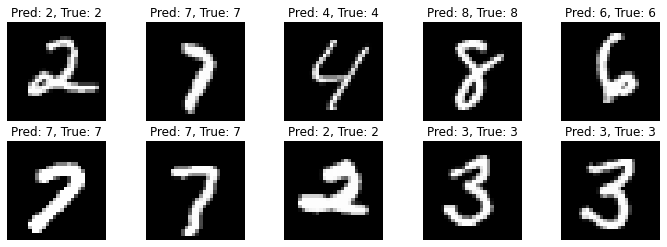

In [3]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST test dataset
(_, _), (test_images, test_labels) = mnist.load_data()

# Normalize the images to the range 0-1
test_images = test_images / 255.0

# Load the previously saved model
model = load_model('mnist_simple_nn_model.h5')

# Function to make predictions on a subset of test images
def make_predictions(model, images, true_labels, num_images=10):
    # Randomly select a few images
    indices = np.random.choice(np.arange(len(images)), num_images, replace=False)
    sample_images = images[indices]
    sample_labels = true_labels[indices]

    # Predict the classes of the images
    predictions = model.predict(sample_images)

    # Display the images with their predicted and true labels
    plt.figure(figsize=(12, 4))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(sample_images[i], cmap='gray')
        plt.title(f"Pred: {np.argmax(predictions[i])}, True: {sample_labels[i]}")
        plt.axis('off')
    plt.show()

# Call the function to make predictions
make_predictions(model, test_images, test_labels)
